# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Not sure where to begin? Scroll to the bottom to find challenges!

In [3]:
import pandas as pd 
ccf = pd.read_csv('credit_card_fraud.csv') 
ccf.head(100)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


In [3]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [5]:
ccf.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
ccf=ccf.drop('trans_num', axis=1)

In [5]:
ccf.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,43.753735,-111.454923,0


In [6]:
trans_date_time= ccf['trans_date_trans_time'].str.split(" ", n=1, expand=True)


In [7]:
ccf['trans_date']=trans_date_time[0]

In [103]:
ccf.drop('trans_date_trans_time',axis=1,inplace=True)

In [49]:
ccf['category'].unique()

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [61]:
ccf.groupby('is_fraud').count()

,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,trans_date
is_fraud,,,,,,,,,,,,,
0,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825
1,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782


In [8]:
fraud=ccf[ccf['is_fraud']==1]

In [9]:
fraud.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date
945,2019-01-04 00:58:03,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.654142,-164.722603,1,2019-01-04
1077,2019-01-04 15:06:38,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.468863,-165.473127,1,2019-01-04
1184,2019-01-04 22:37:04,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.347667,-165.914542,1,2019-01-04
1192,2019-01-04 23:06:28,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,64.445035,-166.080207,1,2019-01-04
1202,2019-01-04 23:59:09,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.447094,-165.446843,1,2019-01-04


In [107]:
type(fraud['trans_date'])

pandas.core.series.Series

In [10]:
fraud['trans_date']=pd.to_datetime(fraud['trans_date'])

In [11]:
fraud['year_month']=fraud['trans_date'].dt.strftime('%Y-%m')

In [12]:
data1=fraud.groupby('category').count()['is_fraud'].sort_values(ascending=False)

In [13]:
data1

category
grocery_pos       433
shopping_net      381
misc_net          217
shopping_pos      187
gas_transport     153
misc_pos           62
entertainment      55
kids_pets          55
personal_care      55
home               50
food_dining        38
health_fitness     36
travel             33
grocery_net        27
Name: is_fraud, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'FRAUD TRANSACTIONS BY CATEGORY')]

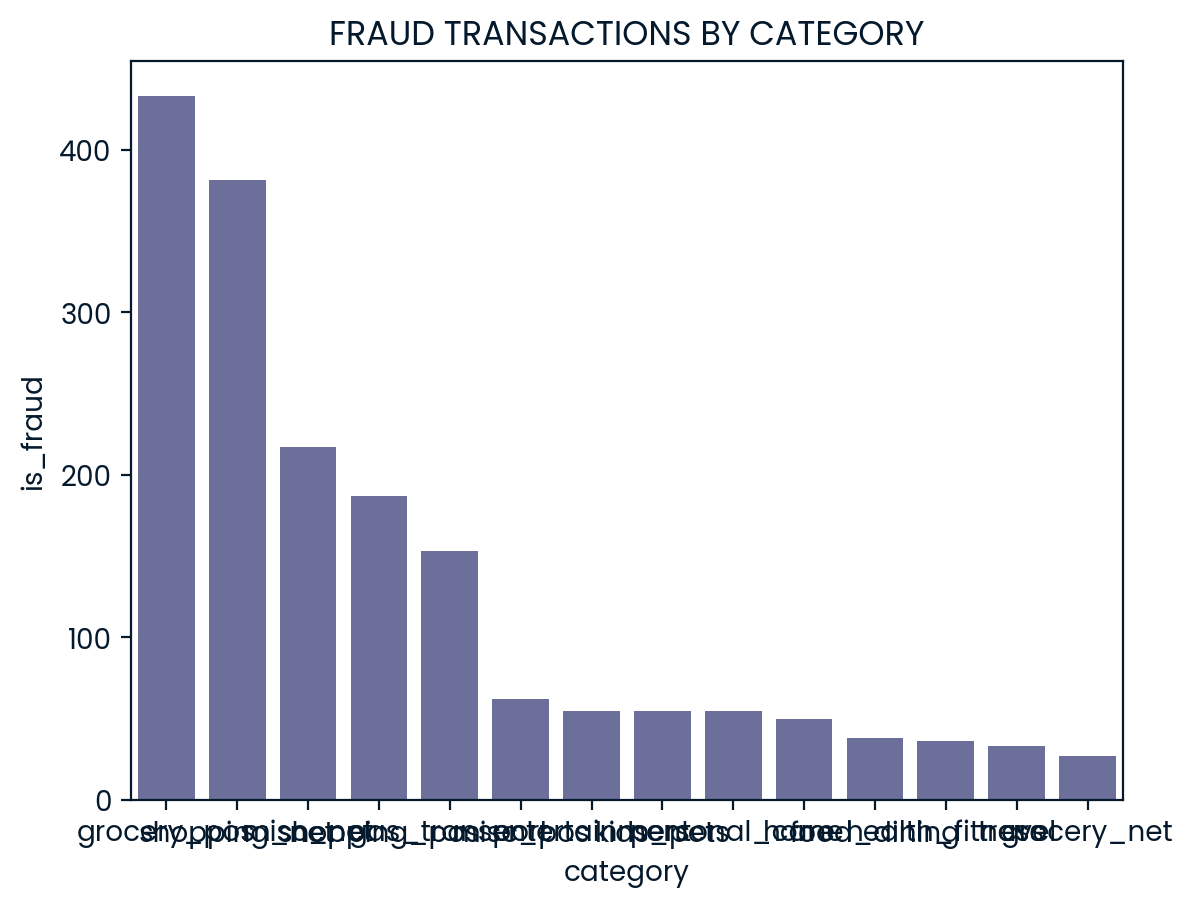

In [73]:
sns.barplot(data=data1).set(title='FRAUD TRANSACTIONS BY CATEGORY')

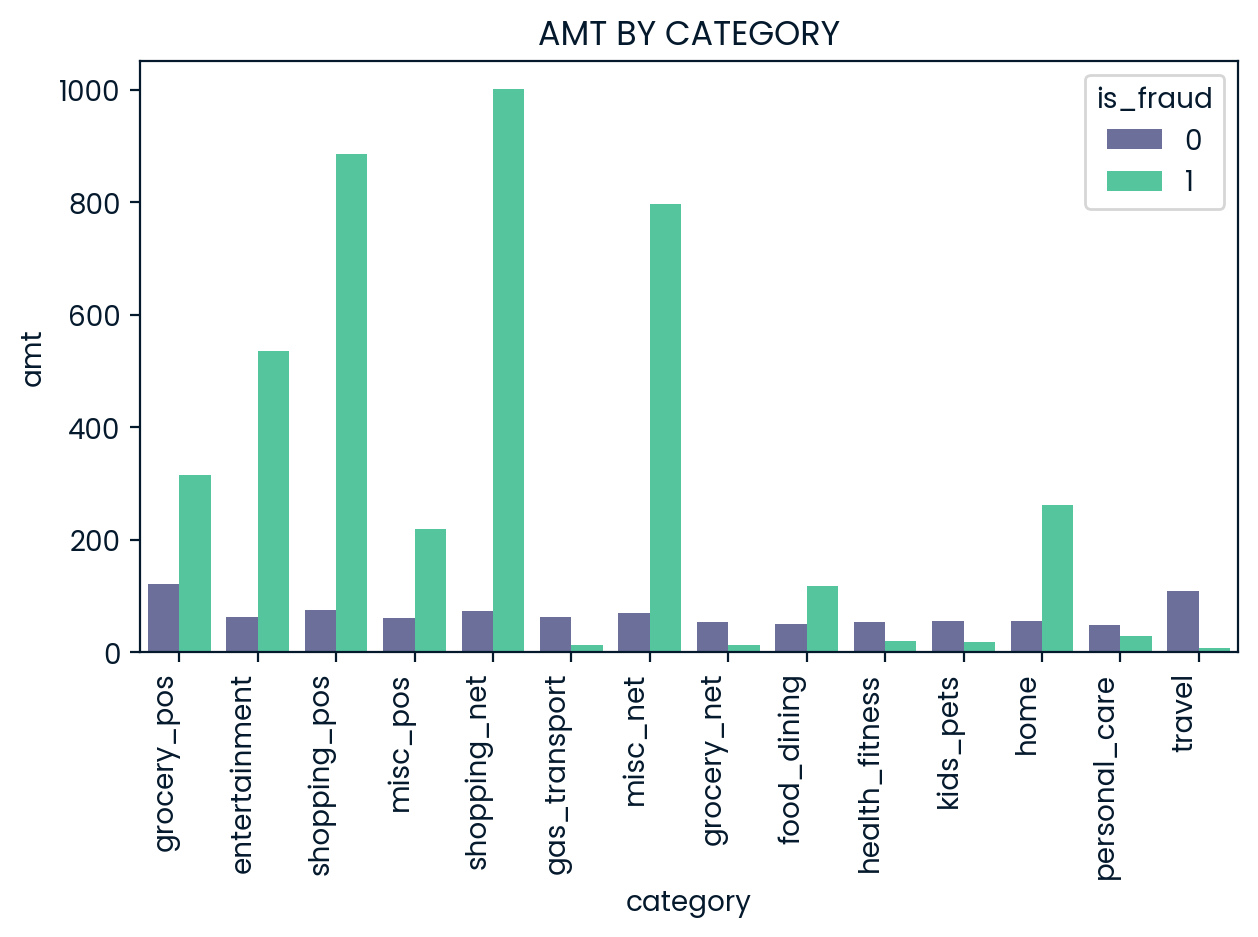

In [87]:
ax=sns.barplot(data=ccf, x='category', y='amt', hue='is_fraud',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('AMT BY CATEGORY')
plt.tight_layout()
plt.show()

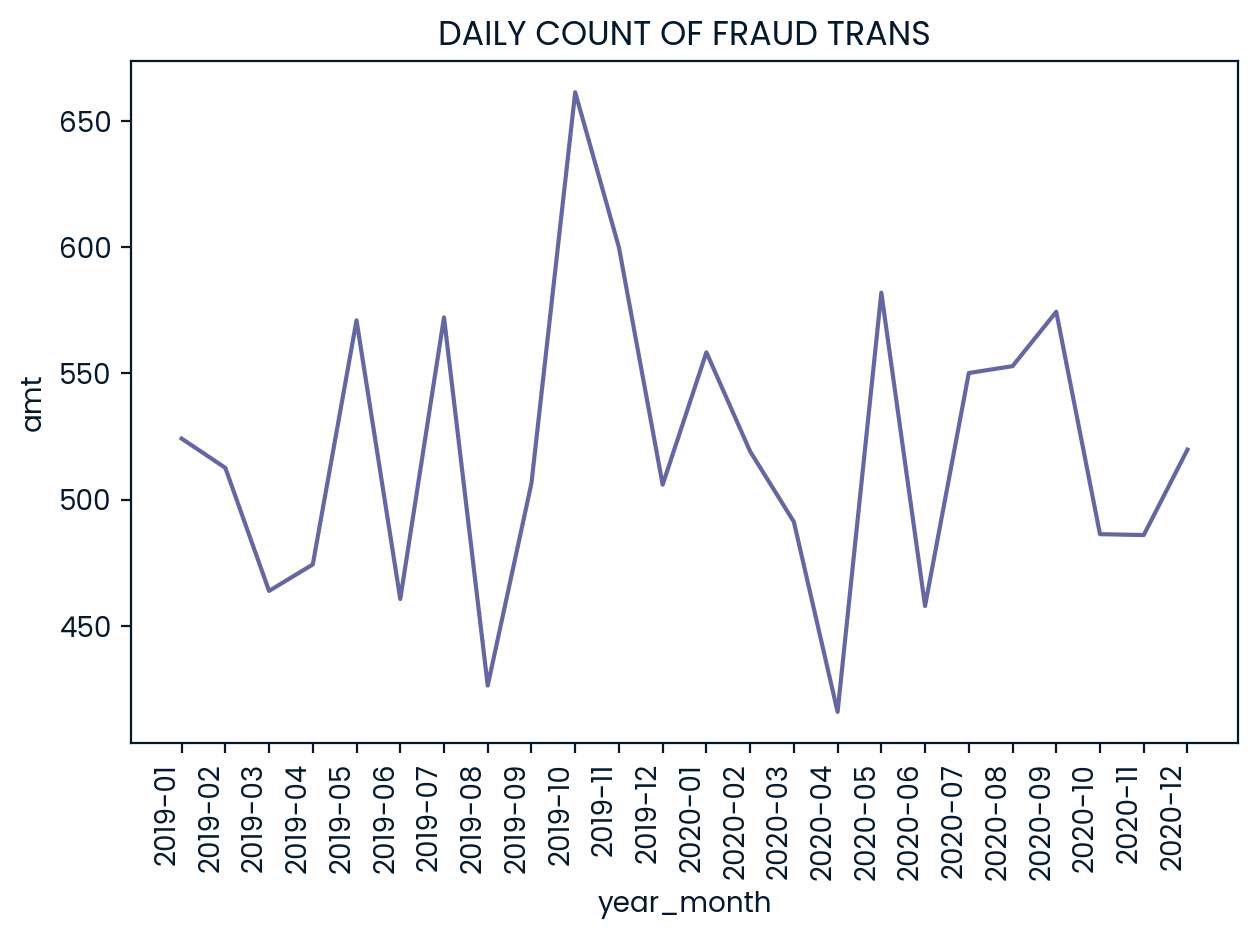

In [143]:
ax1=sns.lineplot(data=fraud, x='year_month', y='amt',errorbar=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('MONTHLY COUNT OF FRAUD TRANS')
plt.tight_layout()
plt.show()

In [152]:
fraud_state=fraud[["state","is_fraud"]]

In [153]:
fraud_state

,state,is_fraud
945,AK,1
1077,AK,1
1184,AK,1
1192,AK,1
1202,AK,1
...,...,...
322261,CA,1
322468,CA,1
322821,CA,1
322846,CA,1


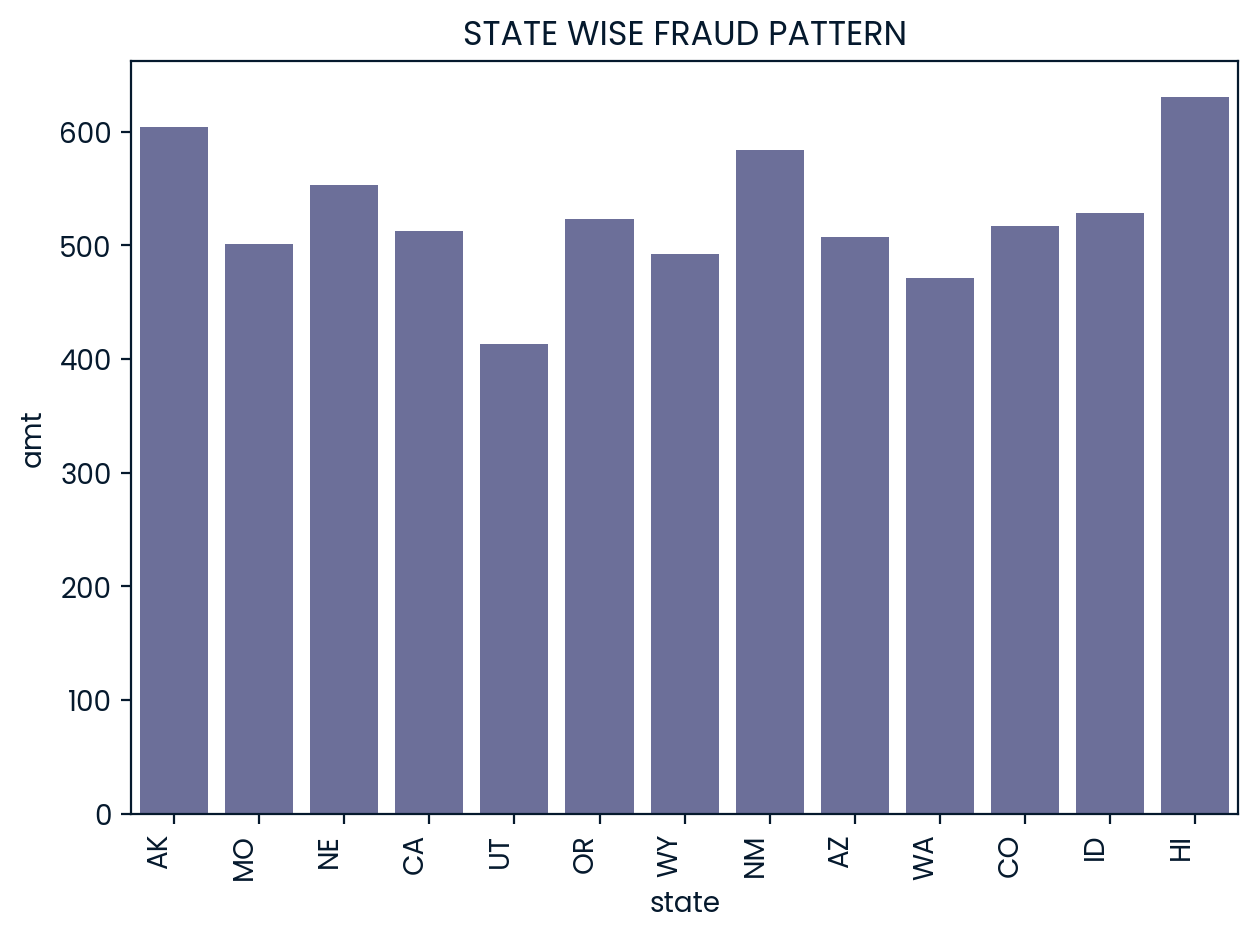

In [161]:
ax1=sns.barplot(data=fraud, x='state', y='amt',errorbar=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('STATE WISE FRAUD PATTERN')
plt.tight_layout()
plt.show()


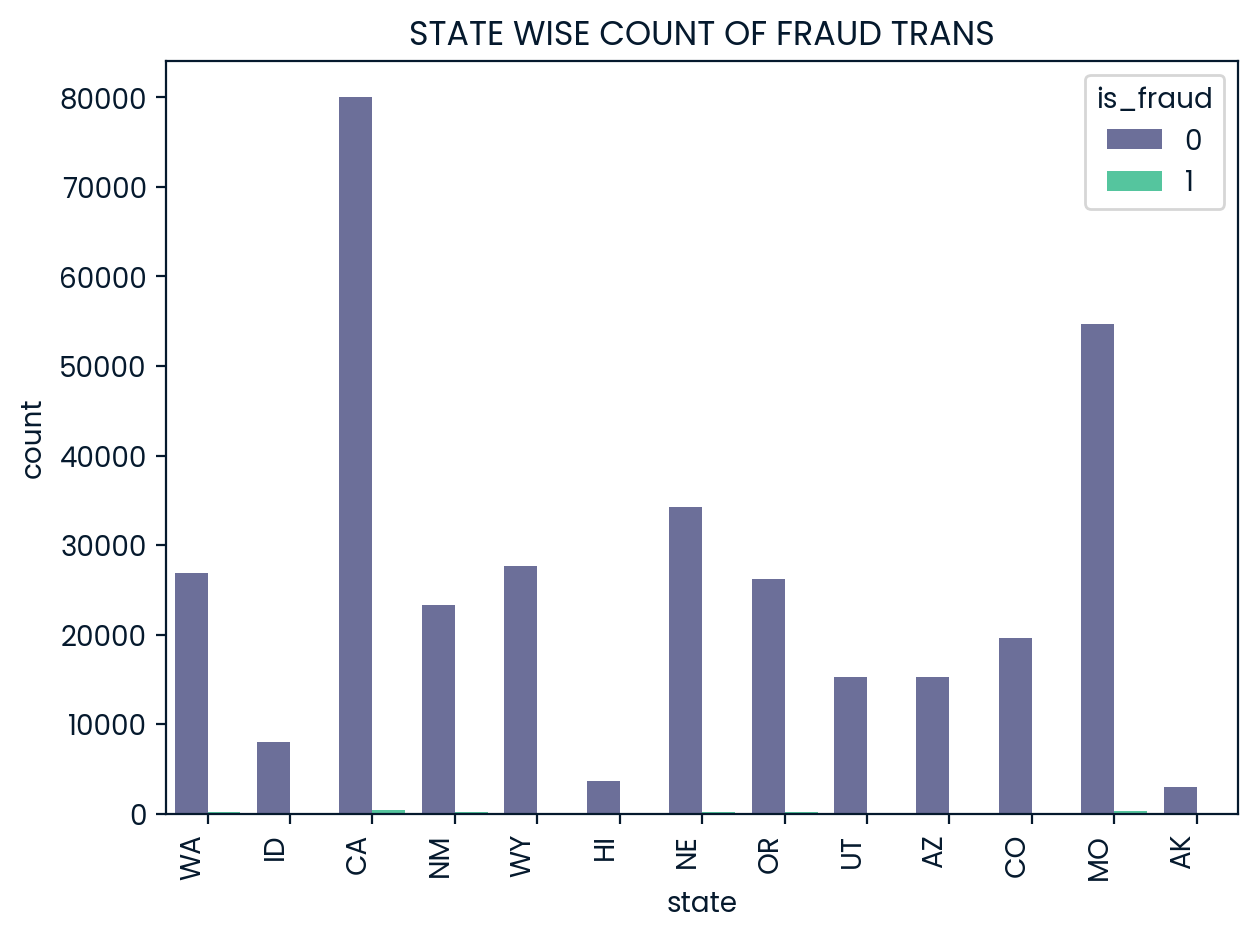

In [178]:
ax1=sns.countplot(data=ccf, x='state', hue='is_fraud')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('STATE WISE COUNT OF FRAUD TRANS')
plt.tight_layout()
plt.show()

In [75]:
A=fraud.groupby(['state', 'job']).count()['is_fraud']
A

state  job                                   
AK     Administrator, education                  15
       Careers information officer               12
       Commissioning editor                      14
       Engineer, civil (consulting)               9
AZ     Building surveyor                         12
                                                 ..
WY     Music therapist                           14
       Pilot, airline                             2
       Product/process development scientist      7
       Public librarian                          11
       Research scientist (physical sciences)    14
Name: is_fraud, Length: 180, dtype: int64

In [76]:
B=ccf.groupby(['state', 'job']).count()['is_fraud']

In [91]:
new2=df = pd.merge(A, B, right_index = True, left_index = True)

In [118]:
new2

,state,job,FRAUD TRANS COUNT,TOTAL TRANS COUNT,percentage of fraud
0,AK,"Administrator, education",15,2203,0.68
1,AK,Careers information officer,12,12,100.00
2,AK,Commissioning editor,14,14,100.00
3,AK,"Engineer, civil (consulting)",9,734,1.23
4,AZ,Building surveyor,12,1469,0.82
...,...,...,...,...,...
175,WY,Music therapist,14,3643,0.38
176,WY,"Pilot, airline",2,2909,0.07
177,WY,Product/process development scientist,7,1459,0.48
178,WY,Public librarian,11,2196,0.50


In [93]:
new2.columns = ['FRAUD TRANS COUNT', 'TOTAL TRANS COUNT']

In [94]:
new2['percentage of fraud']=((new2['FRAUD TRANS COUNT']/new2['TOTAL TRANS COUNT'])*100).round(2)

In [117]:
new2.reset_index(inplace=True)

In [121]:
new3=new2[['state','job', 'FRAUD TRANS COUNT']]

In [122]:
new3

,state,job,FRAUD TRANS COUNT
0,AK,"Administrator, education",15
1,AK,Careers information officer,12
2,AK,Commissioning editor,14
3,AK,"Engineer, civil (consulting)",9
4,AZ,Building surveyor,12
...,...,...,...
175,WY,Music therapist,14
176,WY,"Pilot, airline",2
177,WY,Product/process development scientist,7
178,WY,Public librarian,11


<Axes: xlabel='state', ylabel='percentage of fraud'>

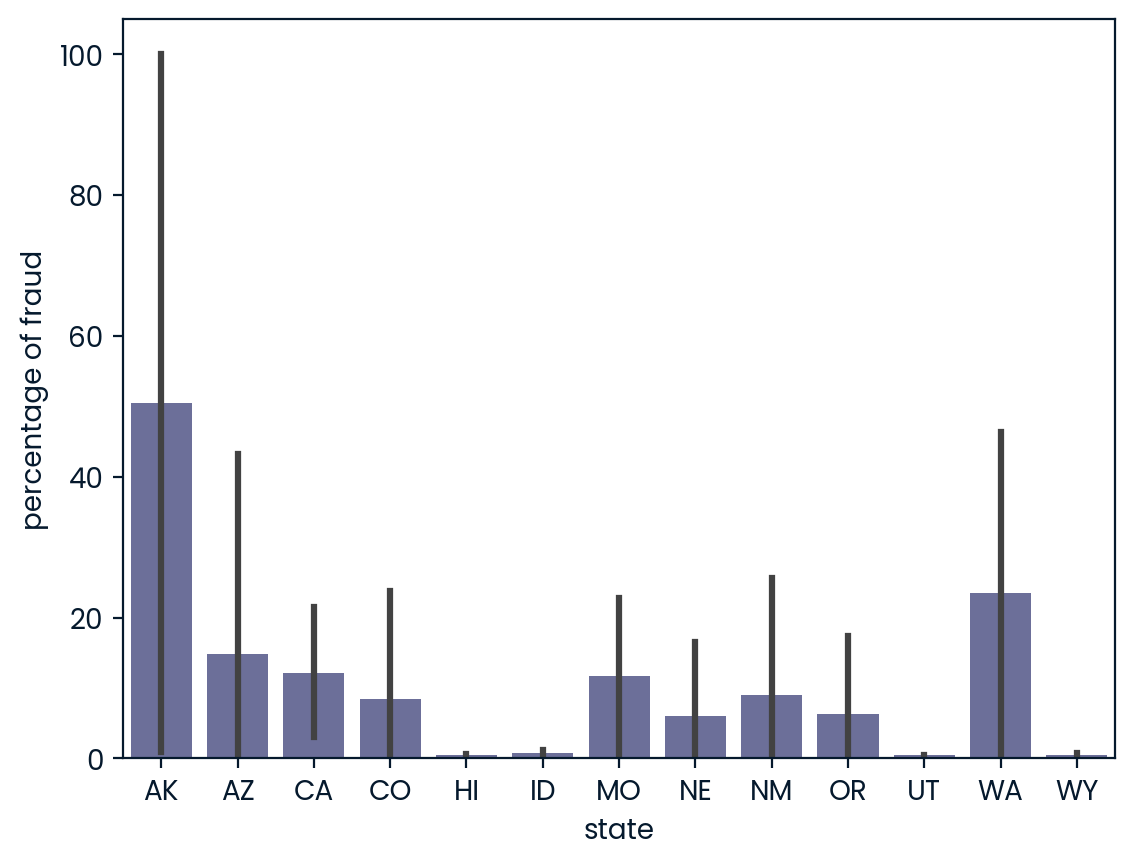

In [110]:
sns.barplot(new2, x='state', y='percentage of fraud')

In [123]:
new3=new3.pivot(index="state", columns="job", values="FRAUD TRANS COUNT")

<Axes: xlabel='job', ylabel='state'>

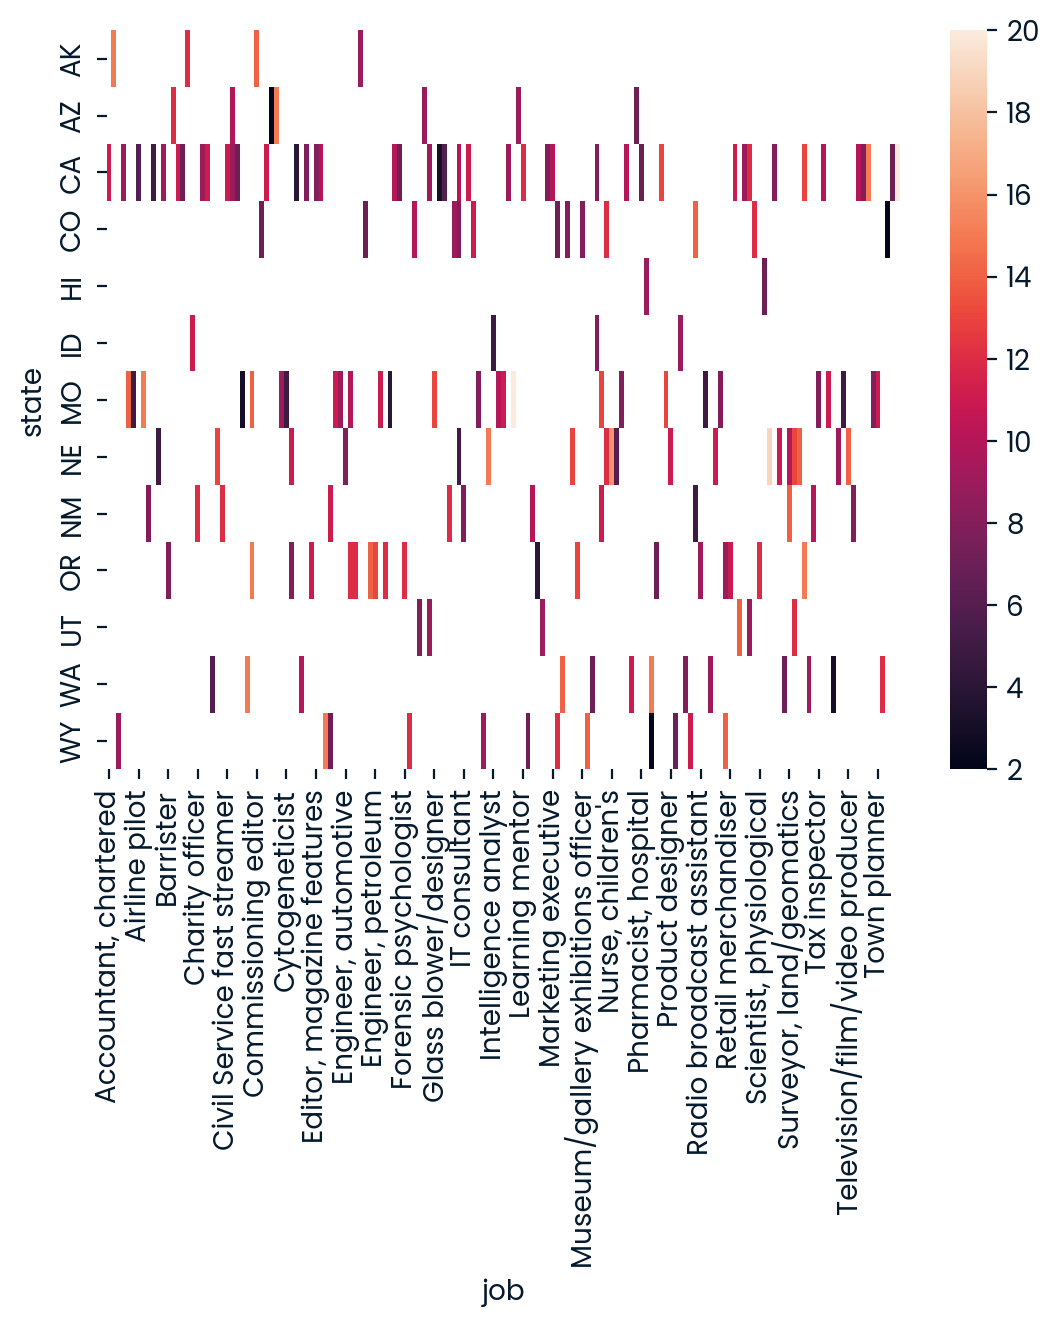

In [124]:
sns.heatmap(new3)

## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

[Source](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) of dataset. The data was partially cleaned and adapted by DataCamp.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
- 📊 **Visualize**: Use a geospatial plot to visualize the fraud rates across different states.
- 🔎 **Analyze**: Are older customers significantly more likely to be victims of credit card fraud?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.